In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
dataset = pd.read_csv("/Users/parthrathi/Desktop/jupyterNotebook/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
cdf = dataset[['age','bmi','children','charges']]
cdf.head(7)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
5,31,25.740,0,3756.62160
6,46,33.440,1,8240.58960


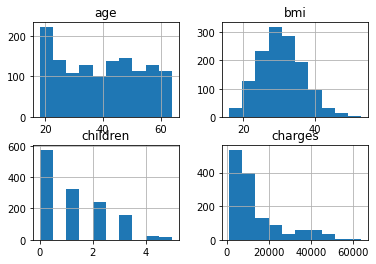

In [9]:
viz = cdf[['age','bmi','children','charges']]
viz.hist()
plt.show()

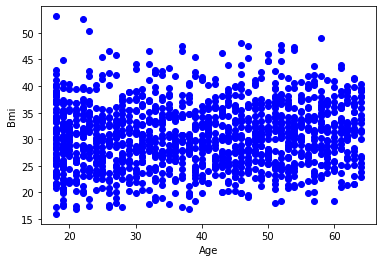

In [10]:
plt.scatter(cdf.age, cdf.bmi,  color='blue')
plt.xlabel("Age")
plt.ylabel("Bmi")
plt.show()

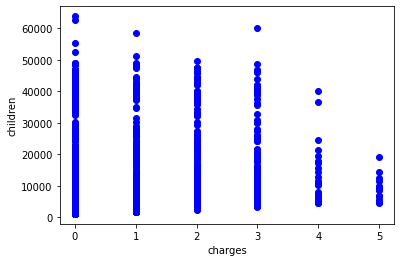

In [12]:
plt.scatter(cdf.children, cdf.charges,  color='blue')
plt.xlabel("charges")
plt.ylabel("children")
plt.show()

In [13]:
msk = np.random.rand(len(dataset)) < 0.8
train = cdf[msk]
test = cdf[~msk]

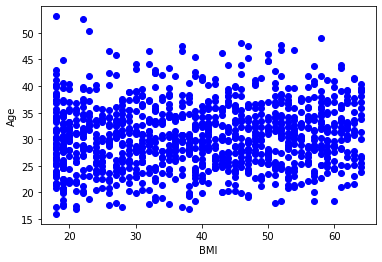

In [14]:
plt.scatter(train.age, train.bmi,  color='blue')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['bmi']])
train_y = np.asanyarray(train[['age']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.2374862]]
Intercept:  [31.75365078]


Text(0, 0.5, 'AGE')

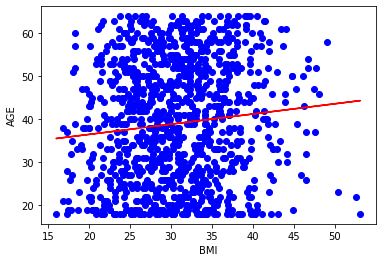

In [16]:
plt.scatter(train.bmi, train.age,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("BMI")
plt.ylabel("AGE")

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['charges']])
train_y = np.asanyarray(train[['children']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[7.78119097e-06]]
Intercept:  [0.98384257]


Text(0, 0.5, 'children')

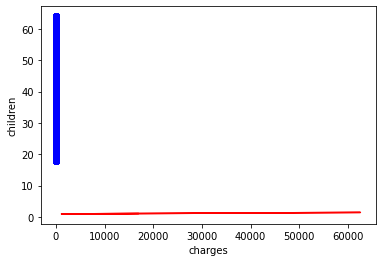

In [21]:
plt.scatter(train.bmi, train.age,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("charges")
plt.ylabel("children")